In [85]:
#Import the dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
from citipy import citipy

In [87]:
# Create a set of random latitude and longitude combinations

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [88]:
# Add the latitudes and longitudes in a list

coordinates = list(lat_lngs)

In [89]:
# Create a list for holding the cities

cities = []

# Identify the nearest city for each latitude and longitude combination

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list
    
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count

len(cities)

626

In [90]:
# Import the requests library

import requests

#Import the API key

from config import weather_api_key

In [91]:
# Starting URL for weather map API call

url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [92]:
#Import the datetime module from the datetime library

from datetime import datetime

In [93]:
#Create an empty list to hold the weather data

city_data = []

# Print the beginning of the logging

print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters

record_count = 1
set_count = 1

# Loop through all the cities in our list

for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    
    if(i % 50 ==0 and i>=50):
        set_count += 1
        record_count = 1
        
    #Create endpoint url for each city
    
    city_url = url + "&q=" + city
        
    #log the url,record, and set numbers and the city
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
        
    #Add 1 to the record count
    
    record_count += 1
        
    #Run an API request for each of the cities
    
    try:
         #Parse the JSON and retrieve the data
            
        city_weather = requests.get(city_url).json()
        
        #Parse out the needed data
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
            
        # Convert the date to ISO standard
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
            
        #Append the city information into city_data list
        
        city_data.append({"City": city.title(),
                             "Lat": city_lat,
                             "Lng": city_lng,
                             "Max Temp": city_max_temp,
                             "Humidity": city_humidity,
                             "Cloudiness": city_clouds,
                             "Wind Speed": city_wind,
                             "Country": city_country,
                             "Date": city_date})
        
    #If an error is experienced, skip the city
    
    except:
        print("City not found. Skipping...")
        pass
    
#Indicate the data loading is complete

print("------------------------------")
print("Data Retrieval Complete       ")
print("------------------------------")       

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | matamoros
Processing Record 3 of Set 1 | luderitz
Processing Record 4 of Set 1 | ahipara
Processing Record 5 of Set 1 | te anau
Processing Record 6 of Set 1 | waipawa
Processing Record 7 of Set 1 | leh
Processing Record 8 of Set 1 | caconda
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | achinsk
Processing Record 11 of Set 1 | halalo
City not found. Skipping...
Processing Record 12 of Set 1 | hamilton
Processing Record 13 of Set 1 | olga
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | pevek
Processing Record 16 of Set 1 | antsohihy
Processing Record 17 of Set 1 | dzaoudzi
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | lazaro cardenas
Processing Record 20 of Set 1 | sorland
Processing Record 21 of Set 1 | altay
Processing Record 22 of Set 1 | belushya guba
City not found. Skipping...
Pr

Processing Record 38 of Set 4 | rio verde de mato grosso
Processing Record 39 of Set 4 | puerto escondido
Processing Record 40 of Set 4 | quatre cocos
Processing Record 41 of Set 4 | constitucion
Processing Record 42 of Set 4 | taltal
Processing Record 43 of Set 4 | killybegs
Processing Record 44 of Set 4 | xingyi
Processing Record 45 of Set 4 | deputatskiy
Processing Record 46 of Set 4 | santiago del estero
Processing Record 47 of Set 4 | chattanooga
Processing Record 48 of Set 4 | banepa
Processing Record 49 of Set 4 | luwuk
Processing Record 50 of Set 4 | aklavik
Processing Record 1 of Set 5 | thunder bay
Processing Record 2 of Set 5 | xaltianguis
Processing Record 3 of Set 5 | abha
Processing Record 4 of Set 5 | kyshtovka
Processing Record 5 of Set 5 | roma
Processing Record 6 of Set 5 | bambous virieux
Processing Record 7 of Set 5 | umm lajj
Processing Record 8 of Set 5 | xiongshi
City not found. Skipping...
Processing Record 9 of Set 5 | tomatlan
Processing Record 10 of Set 5 | i

Processing Record 31 of Set 8 | morondava
Processing Record 32 of Set 8 | isangel
Processing Record 33 of Set 8 | urdzhar
City not found. Skipping...
Processing Record 34 of Set 8 | odienne
Processing Record 35 of Set 8 | victoria
Processing Record 36 of Set 8 | miyako
Processing Record 37 of Set 8 | nelson bay
Processing Record 38 of Set 8 | kaya
Processing Record 39 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 40 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 41 of Set 8 | togur
Processing Record 42 of Set 8 | zakamensk
Processing Record 43 of Set 8 | saint-francois
Processing Record 44 of Set 8 | ararat
Processing Record 45 of Set 8 | rossland
Processing Record 46 of Set 8 | nanortalik
Processing Record 47 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 48 of Set 8 | prince rupert
Processing Record 49 of Set 8 | flin flon
Processing Record 50 of Set 8 | bogorodskoye
Processing Record 1 of Set 9 | tezu
Processing 

Processing Record 11 of Set 12 | wattegama
Processing Record 12 of Set 12 | nevelsk
Processing Record 13 of Set 12 | pirovskoye
Processing Record 14 of Set 12 | shunyi
Processing Record 15 of Set 12 | matara
Processing Record 16 of Set 12 | eydhafushi
Processing Record 17 of Set 12 | bardiyah
Processing Record 18 of Set 12 | jacareacanga
Processing Record 19 of Set 12 | margate
Processing Record 20 of Set 12 | bah
Processing Record 21 of Set 12 | khasan
Processing Record 22 of Set 12 | reigate
Processing Record 23 of Set 12 | bansbaria
Processing Record 24 of Set 12 | malwan
City not found. Skipping...
Processing Record 25 of Set 12 | kaliua
Processing Record 26 of Set 12 | lefka
Processing Record 27 of Set 12 | talcahuano
Processing Record 28 of Set 12 | nosy varika
Processing Record 29 of Set 12 | ogbomosho
Processing Record 30 of Set 12 | konstantinovka
Processing Record 31 of Set 12 | angoche
Processing Record 32 of Set 12 | mangai
Processing Record 33 of Set 12 | beringovskiy
Proc

In [96]:
len(city_data)

568

In [97]:
#Convert the array of dictionaries to a panda dataframe

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,57.38,89,96,1.01,ZA,2022-07-10 05:09:11
1,Matamoros,25.5333,-103.2500,85.82,32,55,17.25,MX,2022-07-10 05:09:12
2,Luderitz,-26.6481,15.1594,55.92,86,63,6.60,NA,2022-07-10 05:09:12
3,Ahipara,-35.1667,173.1667,59.65,84,100,4.05,NZ,2022-07-10 05:04:42
4,Te Anau,-45.4167,167.7167,37.80,82,30,3.00,NZ,2022-07-10 05:09:13
5,Waipawa,-41.4122,175.5153,45.10,63,99,5.73,NZ,2022-07-10 05:09:13
6,Leh,34.1667,77.5833,67.33,42,55,5.99,IN,2022-07-10 05:05:20
7,Caconda,-13.7333,15.0667,50.29,46,21,3.71,AO,2022-07-10 05:09:14
8,Jamestown,42.0970,-79.2353,58.64,54,0,5.75,US,2022-07-10 05:04:15
9,Achinsk,56.2694,90.4993,76.10,53,11,3.87,RU,2022-07-10 05:09:14


In [98]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2022-07-10 05:09:11,-33.9258,18.4232,57.38,89,96,1.01
1,Matamoros,MX,2022-07-10 05:09:12,25.5333,-103.2500,85.82,32,55,17.25
2,Luderitz,NA,2022-07-10 05:09:12,-26.6481,15.1594,55.92,86,63,6.60
3,Ahipara,NZ,2022-07-10 05:04:42,-35.1667,173.1667,59.65,84,100,4.05
4,Te Anau,NZ,2022-07-10 05:09:13,-45.4167,167.7167,37.80,82,30,3.00
5,Waipawa,NZ,2022-07-10 05:09:13,-41.4122,175.5153,45.10,63,99,5.73
6,Leh,IN,2022-07-10 05:05:20,34.1667,77.5833,67.33,42,55,5.99
7,Caconda,AO,2022-07-10 05:09:14,-13.7333,15.0667,50.29,46,21,3.71
8,Jamestown,US,2022-07-10 05:04:15,42.0970,-79.2353,58.64,54,0,5.75
9,Achinsk,RU,2022-07-10 05:09:14,56.2694,90.4993,76.10,53,11,3.87


In [99]:
# Create the output file (CSV)

output_data_file = "weather_data/cities.csv"

#Export the city_data into a csv

city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [100]:
#Extract relevant fields from the dataframe for plotting

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [101]:
#Import the time module

import time

# Get today's date

today = time.strftime("%x")
today

'07/09/22'

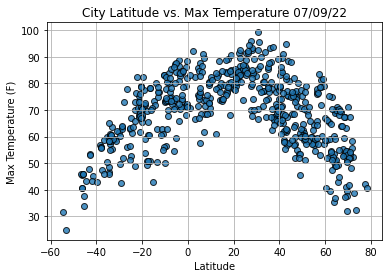

In [102]:
#Build the scatter plot for latitude vs. max temperature

plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties

plt.title("City Latitude vs. Max Temperature " + time.strftime("%x") )
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure

plt.savefig("weather_data/Fig1.png")

#Show plot

plt.show()


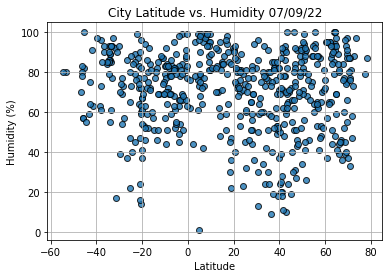

In [103]:
#Build the scatter plot for latitude vs. humidity

plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties

plt.title("City Latitude vs. Humidity " + time.strftime("%x") )
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure

plt.savefig("weather_data/Fig2.png")

#Show plot

plt.show()

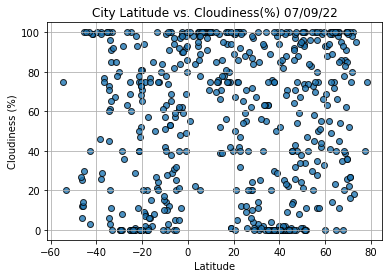

In [104]:
#Build the scatter plot for latitude vs. humidity

plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties

plt.title("City Latitude vs. Cloudiness(%) " + time.strftime("%x") )
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure

plt.savefig("weather_data/Fig3.png")

#Show plot

plt.show()

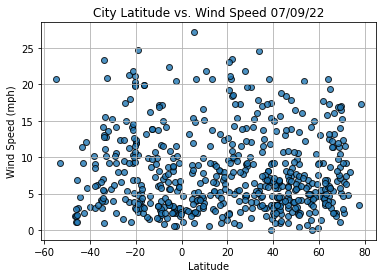

In [105]:
#Build the scatter plot for latitude vs. humidity

plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties

plt.title("City Latitude vs. Wind Speed " + time.strftime("%x") )
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure

plt.savefig("weather_data/Fig4.png")

#Show plot

plt.show()


In [106]:
#Import linear regression from the Scipy stats module

from scipy.stats import linregress

In [107]:
#Create a function to create perform linear regression on the weather data  and  
# plot a regression line and the equation with the data

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #Run regression on hemisphere weather data
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #Calculate the regression line "y-values" from the slope and the intercept
    
    regress_values = x_values * slope + intercept
    
    #Get the equation of the line
    
    line_eq = "y= " + str(round(slope,2)) + "x + " +str(round(intercept,2))
    
    #Create a scatter plot and plot the regression line
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    #Annotate the text for the line equation
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color= "red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()
    print(f"The r-value is {r_value:.3f}")

In [108]:
index13 = city_data_df.loc[13]
index13

City                        Pevek
Country                        RU
Date          2022-07-10 05:09:16
Lat                       69.7008
Lng                      170.3133
Max Temp                     32.2
Humidity                       97
Cloudiness                    100
Wind Speed                  17.02
Name: 13, dtype: object

In [109]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4      False
       ...  
563     True
564     True
565     True
566     True
567     True
Name: Lat, Length: 568, dtype: bool

In [110]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Matamoros,MX,2022-07-10 05:09:12,25.5333,-103.2500,85.82,32,55,17.25
6,Leh,IN,2022-07-10 05:05:20,34.1667,77.5833,67.33,42,55,5.99
8,Jamestown,US,2022-07-10 05:04:15,42.0970,-79.2353,58.64,54,0,5.75
9,Achinsk,RU,2022-07-10 05:09:14,56.2694,90.4993,76.10,53,11,3.87
10,Hamilton,US,2022-07-10 05:09:15,39.1834,-84.5333,71.04,82,0,6.91


In [111]:
# Create Northern and Southern Hemisphere DataFrames

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

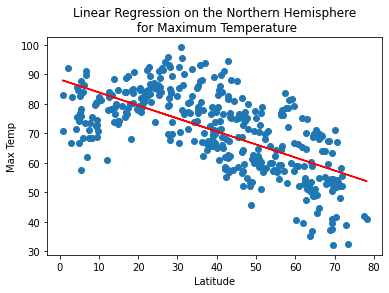

The r-value is -0.653


In [112]:
#linear regression on the northern hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#Call the function

plot_linear_regression(x_values,y_values,
                       "Linear Regression on the Northern Hemisphere\n for Maximum Temperature", "Max Temp", (10,-20))

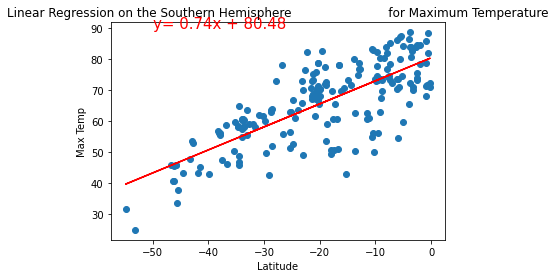

The r-value is 0.762


In [114]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

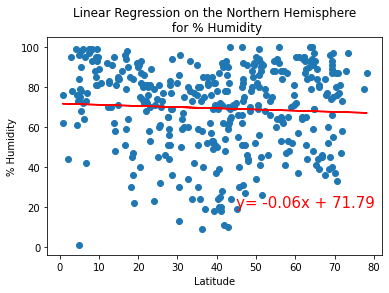

The r-value is -0.055


In [115]:
#linear regression on the northern hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#Call the function

plot_linear_regression(x_values,y_values,
                       "Linear Regression on the Northern Hemisphere\n for % Humidity", "% Humidity", (45,20))

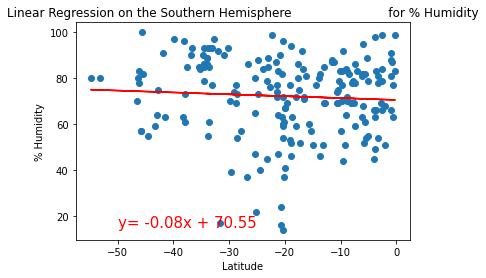

The r-value is -0.063


In [116]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

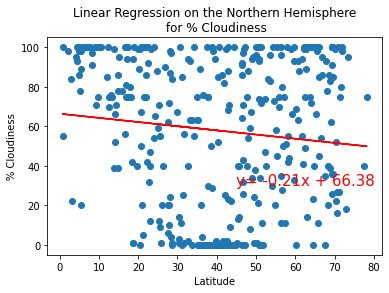

The r-value is -0.110


In [117]:
#linear regression on the northern hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

#Call the function

plot_linear_regression(x_values,y_values,
                       "Linear Regression on the Northern Hemisphere\n for % Cloudiness", "% Cloudiness", (45,30))

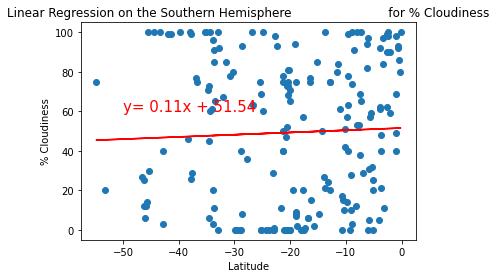

The r-value is 0.041


In [118]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

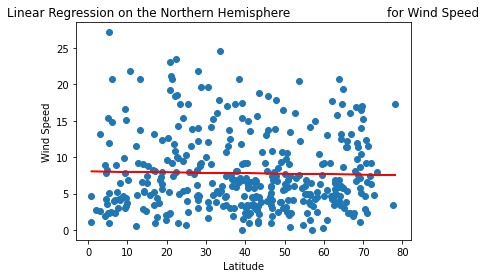

The r-value is -0.024


In [119]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

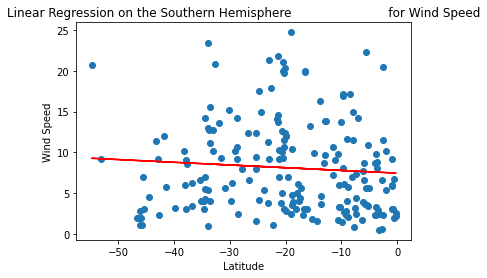

The r-value is -0.078


In [120]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))